In [ ]:
%cd drive/My Drive/final-project/collab

/content/drive/My Drive/final-project/collab


In [ ]:
%%capture
!pip install transformers
import torch
import pandas as pd
from util import train, predict_model, show_preds
from format_data import procedure, init_model, init_optimizer, loss_func
from constants import *

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
path = data_path/"dataset.csv"
MAX_LEN = 256
batch_size = 32
learning_rate = 2e-5
epochs = 4

In [ ]:
# uncomment for data pre-process
procedure(path, MAX_LEN, batch_size)

In [ ]:
train_dataloader = torch.load(data_path/train_loader_file)
val_dataloader = torch.load(data_path/val_loader_file)
test_dataloader = torch.load(data_path/test_loader_file)

labels = pd.read_pickle(data_path/test_label_file)
test_labels = torch.tensor(labels.tolist())
train_labels = pd.read_pickle(data_path/train_label_file)

In [ ]:
model = init_model()
model = model.to(device)
optimizer = init_optimizer(model, learning_rate)
cross_entropy = loss_func(device, train_labels)

Init Model        ...


 Elapsed time: 11.012
Init Optimizer    ... Elapsed time: 0.001
Loss Function     ... Elapsed time: 0.010


In [ ]:
# start training
train(device, model, optimizer, cross_entropy, epochs, train_dataloader, val_dataloader)


 Epoch 1 / 4

Training...
  Batch    50  of  2,051.  Timer: 23.803
  Batch   100  of  2,051.  Timer: 24.315
  Batch   150  of  2,051.  Timer: 25.425
  Batch   200  of  2,051.  Timer: 26.778
  Batch   250  of  2,051.  Timer: 28.385
  Batch   300  of  2,051.  Timer: 27.502
  Batch   350  of  2,051.  Timer: 27.163
  Batch   400  of  2,051.  Timer: 27.611
  Batch   450  of  2,051.  Timer: 27.538
  Batch   500  of  2,051.  Timer: 27.378
  Batch   550  of  2,051.  Timer: 27.418
  Batch   600  of  2,051.  Timer: 27.644
  Batch   650  of  2,051.  Timer: 27.532
  Batch   700  of  2,051.  Timer: 27.357
  Batch   750  of  2,051.  Timer: 27.480
  Batch   800  of  2,051.  Timer: 27.613
  Batch   850  of  2,051.  Timer: 27.671
  Batch   900  of  2,051.  Timer: 27.591
  Batch   950  of  2,051.  Timer: 27.464
  Batch 1,000  of  2,051.  Timer: 27.406
  Batch 1,050  of  2,051.  Timer: 27.372
  Batch 1,100  of  2,051.  Timer: 27.363
  Batch 1,150  of  2,051.  Timer: 27.460
  Batch 1,200  of  2,051.  Tim

In [ ]:
model.load_state_dict(torch.load(data_path/weight_file))

<All keys matched successfully>


Predicting...
  Batch    50  of    440.  Time: 26.796
  Batch   100  of    440.  Time: 26.916
  Batch   150  of    440.  Time: 26.854
  Batch   200  of    440.  Time: 26.806
  Batch   250  of    440.  Time: 26.750
  Batch   300  of    440.  Time: 26.716
  Batch   350  of    440.  Time: 26.638
  Batch   400  of    440.  Time: 26.629
Predict time: 235.095
Save Predictions  ... Elapsed time: 0.005
Accuray: 89.793%
ROC-AUC: 89.11200000000001%


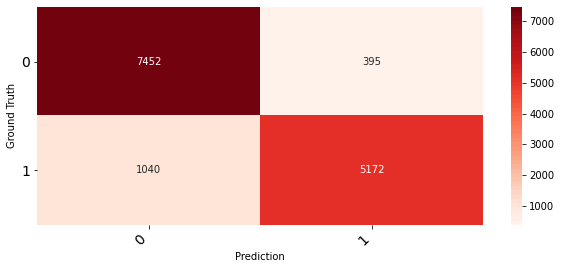

In [ ]:
predicts = predict_model(device, model, test_dataloader)
# predicts = np.load(data_path/"saved_pred.npy")
preds = show_preds(predicts, test_labels)